In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

In [4]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [11]:
import math
N = 1000       #total users
d = 10          #total ads
ads_selected = []
no_of_selections = [0]*d    
sums_of_rewards = [0]*d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if(no_of_selections[i] > 0):
            average_reward = sums_of_rewards[i]/no_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/no_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    no_of_selections[ad] += 1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

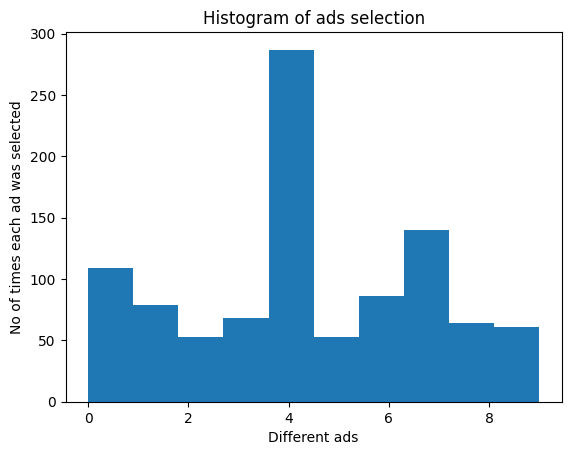

In [12]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection")
plt.xlabel("Different ads")
plt.ylabel("No of times each ad was selected")
plt.show()